# Copyright

<PRE>
Jelen forráskód a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott
"Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.

A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A notebook bármely részének újra felhasználása, publikálása csak a szerzõ írásos beleegyezése esetén megegengedett.

A kód elkészítéséhez az alábbi források kerültek felhasználásra:
https://keras.io/applications/

2023 (c) Gyires-Tóth Bálint (toth.b kukac tmit pont bme pont hu), Zainkó Csaba
</PRE>

## Előtanított háló futtatása
Jelen notebookban egy Imagenet adatbázison előtanított hálózatot fogunk betölteni és futtatni.

In [9]:
import os
from urllib.request import urlretrieve
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
#from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

Egy tetszőleges kép letöltése (jelenleg ezen egy kutya látható):

In [10]:
url_dog="https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg"
urlretrieve(url_dog, "dog.jpg")

('dog.jpg', <http.client.HTTPMessage at 0x7abb1837d4e0>)

ImageNet-el előtanított Inception V3 vagy ResNet50 modell betöltése:

In [11]:
model = InceptionV3(weights='imagenet', include_top=True)
#model = ResNet50(weights='imagenet', include_top=True)

In [12]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalizati

Kép előkészítése a háló számára:

In [13]:
img_path = 'dog.jpg'

img = image.load_img(img_path, target_size=(299, 299)) # Inception V3 esetén 299x299 a bemeneti kép mérete
#img = image.load_img(img_path, target_size=(224, 224)) # ResNet50 esetén 224x224 a bemeneti kép mérete
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

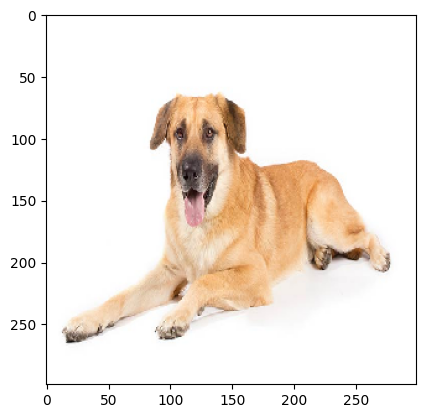

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

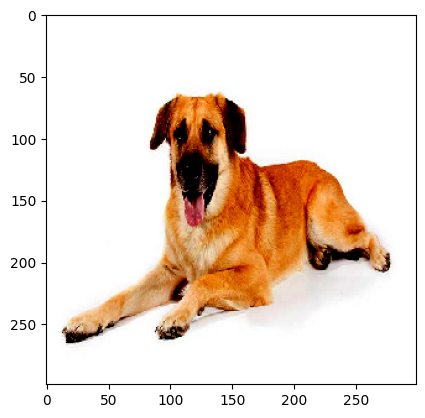

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x[0])

A kép osztályozása és eredmény kiiratása:

In [16]:
preds = model.predict(x)
print('Jósolt osztály:')
print(decode_predictions(preds))

1/1 [==============================] - 2s 2s/step
Jósolt osztály:
[[('n02099712', 'Labrador_retriever', 0.2513207), ('n02105162', 'malinois', 0.08618215), ('n02109525', 'Saint_Bernard', 0.07497167), ('n02108422', 'bull_mastiff', 0.06746572), ('n02099601', 'golden_retriever', 0.053981014)]]
